In [24]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['student-merge.R', 'student-mat.csv', 'student-por.csv']


# **Importing Libraries**

In [25]:
import numpy as np 
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_squared_error,explained_variance_score,mean_absolute_error,mean_squared_log_error,r2_score,roc_auc_score

# **Reading Data**

In [26]:
data_mat = pd.read_csv('../input/student-mat.csv')
data_por = pd.read_csv('../input/student-por.csv')


# **Preprocessing data**

In [27]:
data_mat['Dalc'] = data_mat['Dalc'] + data_mat['Walc']     #Alcohol consumption for all days
data_por['Dalc'] = data_por['Dalc'] + data_por['Walc']


In [28]:
data_mat=data_mat.drop(['Walc'],axis=1)             #We dont we Walc now
data_por=data_por.drop(['Walc'],axis=1)

# **Define dependent variables**

In [29]:
y_train=data_por['G3'].values      #training on student-por 
y_test=data_mat['G3'].values       #testing on student-mat

In [30]:
x_train=data_por.drop(['G3'],axis=1)   #training on student-por 
x_test=data_mat.drop(['G3'],axis=1)    #testing on student-mat 

In [31]:
#Only 85 entries with different G1, G2 and paid are there 
'''df=pd.merge(data_mat,data_por, how='inner',on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet",'guardian',
 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'health', 'absences'])'''

'df=pd.merge(data_mat,data_por, how=\'inner\',on=["school","sex","age","address","famsize","Pstatus","Medu","Fedu","Mjob","Fjob","reason","nursery","internet",\'guardian\',\n \'traveltime\', \'studytime\', \'failures\', \'schoolsup\', \'famsup\', \'activities\', \'nursery\', \'higher\', \'internet\', \'romantic\', \'famrel\', \'freetime\', \'goout\', \'Dalc\', \'health\', \'absences\'])'

# **Independent Variables**

In [32]:
x_train.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'health', 'absences', 'G1', 'G2'],
      dtype='object')

# **Label Encoder**

In [33]:
le=LabelEncoder()
#x_train = x_train.apply(le.fit_transform)
col=['school','sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']
for i in col:
    #print(i)
    x_train[i]=le.fit_transform(x_train[i])
    x_test[i]=le.fit_transform(x_test[i])

# **One Hot Encoder**

In [34]:
#Columns with more than 2 values after LabelEncoder need to be OneHotEncoded
col=['Mjob','Fjob','reason','guardian']      
onehot=OneHotEncoder(categorical_features=[8,9,10,11])
x_train=onehot.fit_transform(x_train).toarray()
x_test=onehot.fit_transform(x_test).toarray()


/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:390: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data w

# **Scaling **

In [35]:
#Scaling values
#col=['age','Medu','Fedu','traveltime','studytime','famrel','freetime','goout','Dalc','health','absences','G1','G2']
col=[2,6,7,12,13,23,24,25,26,27,28,29,30]
for i in col:
    x_train[i]=x_train[i]/x_train[i].max()
    x_test[i]=x_test[i]/x_test[i].max()

In [36]:
#Here it is not required
'''from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)
scy=StandardScaler()

y_train=scy.fit_transform(y_train.reshape(-1,1))
y_test=scy.transform(y_test.reshape(-1,1))'''

'from sklearn.preprocessing import StandardScaler\nsc=StandardScaler()\nx_train=sc.fit_transform(x_train)\nx_test=sc.transform(x_test)\nscy=StandardScaler()\n\ny_train=scy.fit_transform(y_train.reshape(-1,1))\ny_test=scy.transform(y_test.reshape(-1,1))'

In [37]:
y_train=y_train/y_train.max()
y_test=y_test/y_test.max()   



# **Model Creation**

**KNN Regressor**

0.018250955503348643 0.7556017101052465 0.09155229846768818 0.6513080109973236


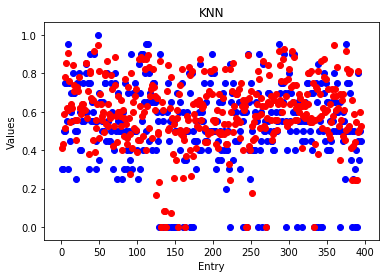

In [78]:
from sklearn import neighbors
n_neighbors=5
knns=neighbors.KNeighborsRegressor(n_neighbors)   #model creation
knns.fit(x_train,y_train)                         #fitting data

y_pred=knns.predict(x_test)                       #predicting

mse1=mean_squared_error(y_test,y_pred)
var1=explained_variance_score(y_test,y_pred)
mae1=mean_absolute_error(y_test,y_pred)
r21=r2_score(y_test,y_pred)
print(mse1,var1,mae1,r21)
plt.scatter(np.arange(1,len(y_test)+1).tolist(), y_test, color = 'blue')
plt.scatter(np.arange(1,len(y_pred)+1).tolist(), y_pred, color = 'red')
plt.title("KNN")
plt.xlabel("Entry")
plt.ylabel("Values")
plt.show()

**S Regressor**

0.016829551336230937 0.7877962219542194 0.08664220665675641 0.6784645204807875


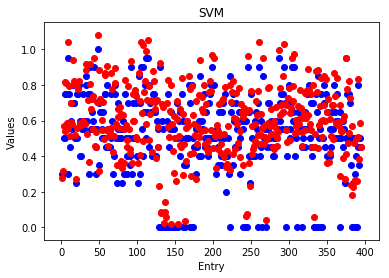

In [74]:
from sklearn import svm
svm_reg=svm.SVR(kernel='linear')
svm_reg.fit(x_train,y_train)
y_pred=svm_reg.predict(x_test)


mse2=mean_squared_error(y_test,y_pred)
var2=explained_variance_score(y_test,y_pred)
mae2=mean_absolute_error(y_test,y_pred)
r22=r2_score(y_test,y_pred)
print(mse2,var2,mae2,r22)
plt.scatter(np.arange(1,len(y_test)+1).tolist(), y_test, color = 'blue')
plt.scatter(np.arange(1,len(y_pred)+1).tolist(), y_pred, color = 'red')
plt.title("SVM")
plt.xlabel("Entry")
plt.ylabel("Values")
plt.show()

**Linear Regressor**

0.013945483071588901 0.8070415367031922 0.0725257212088047 0.7335658273374621


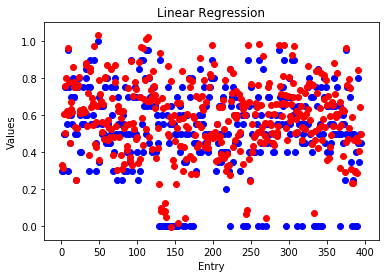

In [75]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred=lr.predict(x_test)


mse3=mean_squared_error(y_test,y_pred)
var3=explained_variance_score(y_test,y_pred)
mae3=mean_absolute_error(y_test,y_pred)
r23=r2_score(y_test,y_pred)
print(mse3,var3,mae3,r23)
plt.scatter(np.arange(1,len(y_test)+1).tolist(), y_test, color = 'blue')
plt.scatter(np.arange(1,len(y_pred)+1).tolist(), y_pred, color = 'red')
plt.title("Linear Regression")
plt.xlabel("Entry")
plt.ylabel("Values")
plt.show()

**Decision Tree Regressor**

0.020627616676601564 0.6778941109515237 0.08920719520319785 0.605900924692448


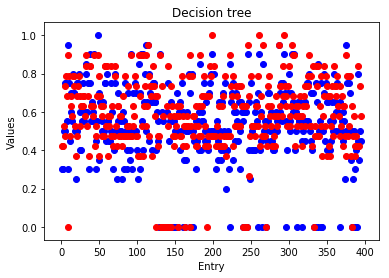

In [76]:
from sklearn.tree import DecisionTreeRegressor
clf=DecisionTreeRegressor()
clf=clf.fit(x_train,y_train)

y_pred=clf.predict(x_test)


mse4=mean_squared_error(y_test,y_pred)
var4=explained_variance_score(y_test,y_pred)
mae4=mean_absolute_error(y_test,y_pred)
r24=r2_score(y_test,y_pred)
print(mse4,var4,mae4,r24)
plt.scatter(np.arange(1,len(y_test)+1).tolist(), y_test, color = 'blue')
plt.scatter(np.arange(1,len(y_pred)+1).tolist(), y_pred, color = 'red')
plt.title("Decision tree")
plt.xlabel("Entry")
plt.ylabel("Values")
plt.show()

**Random Forest Regressor**

0.013979474147059743 0.8034661067195988 0.07573431045969285 0.7329164139019797


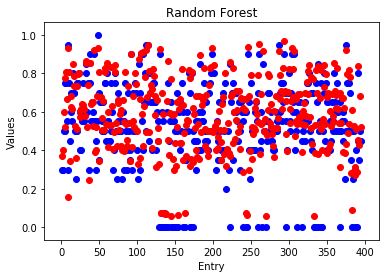

In [79]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=500)
rf.fit(x_train,y_train)

y_pred=rf.predict(x_test)


mse5=mean_squared_error(y_test,y_pred)
var5=explained_variance_score(y_test,y_pred)
mae5=mean_absolute_error(y_test,y_pred)
r25=r2_score(y_test,y_pred)
print(mse5,var5,mae5,r25)
plt.scatter(np.arange(1,len(y_test)+1).tolist(), y_test, color = 'blue')
plt.scatter(np.arange(1,len(y_pred)+1).tolist(), y_pred, color = 'red')
plt.title("Random Forest")
plt.xlabel("Entry")
plt.ylabel("Values")
plt.show()

**AdaBoost Regressor**

0.01951303774321644 0.7136306092589786 0.09165981974750226 0.6271954122666045


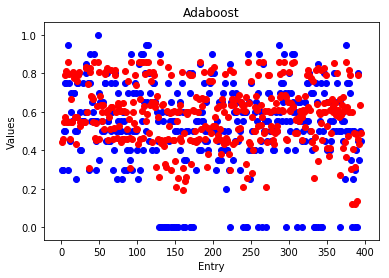

In [80]:
from sklearn.ensemble import AdaBoostRegressor
ad=AdaBoostRegressor()
ad.fit(x_train,y_train)

y_pred=ad.predict(x_test)

mse6=mean_squared_error(y_test,y_pred)
var6=explained_variance_score(y_test,y_pred)
mae6=mean_absolute_error(y_test,y_pred)
r26=r2_score(y_test,y_pred)
print(mse6,var6,mae6,r26)
plt.scatter(np.arange(1,len(y_test)+1).tolist(), y_test, color = 'blue')
plt.scatter(np.arange(1,len(y_pred)+1).tolist(), y_pred, color = 'red')
plt.title("Adaboost")
plt.xlabel("Entry")
plt.ylabel("Values")
plt.show()

# **Visualizations and Evaluations**

**Mean Squared Error**

Text(0.5,0,'Model type')

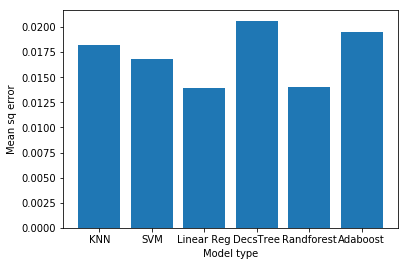

In [81]:
x=['KNN','SVM','Linear Reg','DecsTree','Randforest','Adaboost']
y=[mse1,mse2,mse3,mse4,mse5,mse6]
fig, ax = plt.subplots()
plt.bar(x,y)
ax.set_ylabel('Mean sq error')
ax.set_xlabel('Model type')


**Variance**

Text(0.5,0,'Model type')

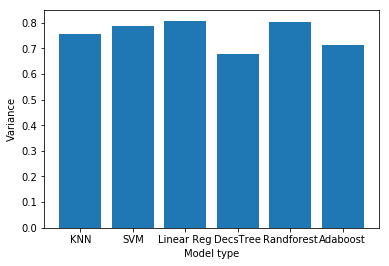

In [82]:
y=[var1,var2,var3,var4,var5,var6]
fig, ax = plt.subplots()
plt.bar(x,y)
ax.set_ylabel('Variance')
ax.set_xlabel('Model type')


**Mean Absolute Error**

Text(0.5,0,'Model type')

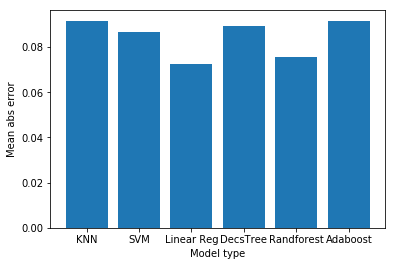

In [83]:
y=[mae1,mae2,mae3,mae4,mae5,mae6]
fig, ax = plt.subplots()
plt.bar(x,y)
ax.set_ylabel('Mean abs error')
ax.set_xlabel('Model type')


**R2 score**

Text(0.5,0,'Model type')

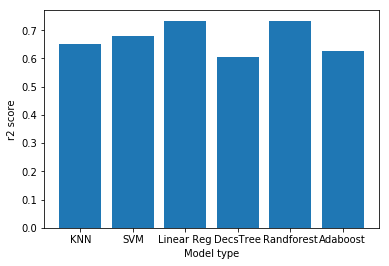

In [84]:
y=[r21,r22,r23,r24,r25,r26]
fig, ax = plt.subplots()
plt.bar(x,y)
ax.set_ylabel('r2 score')
ax.set_xlabel('Model type')


# **Inferences**

* Linear Regression and Random Forest Regressor are best models for this data with mean squared error of 0.0139 and 0.0141 respectively .
* Decision Tree and Adaboost performs worst with mean squared error of 0.0204.


# **Reasoning**

As we see the scatter plot between actual values and predicted values Linear regressor and Random Forest Regressor are most accurate among all other models and Adaboost and Decision Tree are least accurate.